In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import os

In [2]:
imgfname = '../figure/camera.bmp'

qualities = np.linspace(0.05, 1, 100)

# 将图片按照不同的quality参数进行压缩并解码，得到恢复后的图片
import tqdm
for q in tqdm.tqdm(qualities):
    cmd = f'../build/JxrEncApp -i {imgfname} ' + \
          f'-o ../figure/camera.{q}.jxr ' + \
          f'-c 0 ' + \
          f'-q {q} ' + \
          f'-d 1' # YUV 420

    os.system(cmd)

    cmd = f'../build/JxrDecApp -i ../figure/camera.{q}.jxr ' + \
          f'-o ../figure/camera.{q}.bmp ' + \
          f'-c 0'

    os.system(cmd)

100%|██████████| 100/100 [00:01<00:00, 76.76it/s]


In [3]:
# 比较文件大小，计算PSNR
import utils
import cv2

fsizes = []
psnrs = []

for q in tqdm.tqdm(qualities):
    ori_img = '../figure/camera.bmp'
    jxr_img = f'../figure/camera.{q}.jxr'
    dec_img = f'../figure/camera.{q}.bmp'

    fsizes.append(
        os.stat(jxr_img).st_size
    )
    
    img1 = cv2.imread(ori_img)
    img2 = cv2.imread(dec_img)

    psnrs.append(
        utils.psnr(img1, img2)
    )

ori_fsize = os.stat(
    '../figure/camera.bmp'
).st_size

fsizes = np.array(fsizes)
psnrs = np.array(psnrs)

100%|██████████| 100/100 [00:00<00:00, 1392.62it/s]


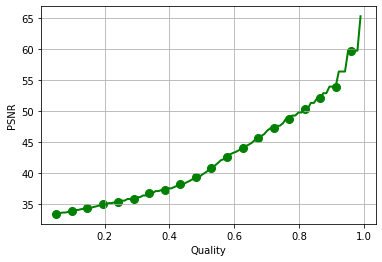

In [8]:
# 绘制 quality-psnr
plt.plot(qualities[:-1], psnrs[:-1], lw = 2, color = 'green')
plt.scatter(qualities[:-1][::5], psnrs[:-1][::5], s = 64, color = 'green')
plt.grid('on')
plt.xlabel('Quality')
plt.ylabel('PSNR')

plt.show()

In [ ]:
# 绘制压缩比-PSNR
plt.plot(ori_fsize / fsizes[:-1], psnrs[:-1], lw = 2, color = 'green')
plt.scatter(ori_fsize / fsizes[:-1][::5], psnrs[:-1][::5], s = 64, color = 'green')
plt.grid('on')
plt.xlabel('Compression rate')
plt.ylabel('PSNR')

plt.show()